# Task. 1 Discrete Models
### Ivan Dubinin, 335433, J41321
#### - Determine the «survival» rates independently for men and women for all age groups (“0-4” -> “5-9” -> “10-14” ...) according to 2000-2005 years (data for Russia or any other country)
#### - Determine the fertility rate for women in the age category “20- ... -39”
#### - Calculate boys/girls ratio for newborn children
#### - Predict the change in the country's population and demographic profile for 100 years and compare with existing prediction!

For that:
 - Write out equations for modeling
 - Define input/output data and parameters


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from functools import red


uce
import numpy as np

### Load dataset

In [17]:
# Load Dataset
path_to_src_file = "Japan_Stats.csv"
path_to_pred_file = "Japan_Predicts.csv"
path_to_save_file = "Japan_Simulation.csv"

source_df = pd.read_csv(path_to_src_file, delimiter=';', engine='python', decimal=',')
source_df["100+"] = source_df["100+"].astype('float')
pred_df = pd.read_csv(path_to_pred_file, delimiter=';', engine='python', decimal=',')
source_df

,Index,Sex,Country,Code,Year,0 - 4,5 - 9,10 - 14,15 - 19,20 - 24,...,55 - 59,60 - 64,65 - 69,70 - 74,75 - 79,80 - 84,85 - 89,90 - 94,95 - 99,100+
0,75,m,Japan,392,1950,5699.000,4901.000,4452.000,4354.000,3844.000,...,1380.000,1107.000,799.000,543.000,269.000,126.000,NaN,NaN,NaN,NaN
1,75,m,Japan,392,1955,4864.000,5608.000,4883.000,4383.000,4220.000,...,1606.000,1225.000,915.000,595.000,344.000,173.001,NaN,NaN,NaN,NaN
2,75,m,Japan,392,1960,4079.000,4842.000,5548.000,4742.000,4134.000,...,1806.000,1446.000,1030.000,703.000,382.000,227.999,NaN,NaN,NaN,NaN
3,75,m,Japan,392,1965,4185.000,4071.000,4802.000,5437.000,4545.000,...,1930.000,1630.000,1216.000,787.000,451.000,261.000,NaN,NaN,NaN,NaN
4,75,m,Japan,392,1970,4550.000,4212.000,4054.000,4608.000,5328.000,...,2049.000,1761.000,1403.000,965.000,535.000,332.997,NaN,NaN,NaN,NaN
5,75,m,Japan,392,1975,5099.000,4566.000,4227.000,4069.000,4604.000,...,2072.000,1928.000,1563.000,1140.000,680.000,425.000,NaN,NaN,NaN,NaN
6,75,m,Japan,392,1980,4407.065,5119.698,4582.225,4219.839,3993.499,...,2490.654,1947.969,1736.879,1310.324,840.974,581.226,NaN,NaN,NaN,NaN
7,75,m,Japan,392,1985,3814.195,4367.498,5140.524,4594.212,4160.759,...,3404.711,2377.005,1778.760,1502.107,1015.720,796.998,NaN,NaN,NaN,NaN
8,75,m,Japan,392,1990,3363.761,3864.518,4425.084,5117.087,4472.082,...,3780.212,3201.135,2181.490,1563.923,1192.944,1026.427,NaN,NaN,NaN,NaN
9,75,m,Japan,392,1995,3072.029,3352.024,3829.478,4388.652,5044.535,...,3909.183,3614.317,3000.673,1942.832,1261.238,825.033,362.194,100.285,15.715,1.206


In [18]:
def get_df_row(dataframe, sex, year):
    return dataframe.loc[(dataframe['Sex'] == sex) & (dataframe['Year'] == year)]

def get_data_from_df(dataframe, sex = "m", year = 2050):
    try:
        return get_df_row(dataframe, sex, year)[ages].values.flatten().tolist()
    except:
        return None

In [19]:
men = {}
men[2000] = get_df_row(source_df, "m", 2000).iloc[0] # Convert to pandas Series
men[2005] = get_df_row(source_df, "m", 2005).iloc[0]

women = {}
women[2000] = get_df_row(source_df, "f", 2000).iloc[0]
women[2005] = get_df_row(source_df, "f", 2005).iloc[0]

ages  =  ["%d - %d" % (i, i+4) for i in range(0, 99, 5)]
ages.append("100+")
print(ages)

# Difference between dataframe (returned from .loc[] row) and series (returned from .iloc[] row)
print(type( get_df_row(source_df, "m", 2000)))
print(type( get_df_row(source_df, "m", 2000)["0 - 4"]))
print( get_df_row(source_df, "m", 2000)["0 - 4"])

print(type(source_df.iloc[10]))
print(type(source_df.iloc[10].loc["0 - 4"]))
print(source_df.iloc[10].loc["0 - 4"])



['0 - 4', '5 - 9', '10 - 14', '15 - 19', '20 - 24', '25 - 29', '30 - 34', '35 - 39', '40 - 44', '45 - 49', '50 - 54', '55 - 59', '60 - 64', '65 - 69', '70 - 74', '75 - 79', '80 - 84', '85 - 89', '90 - 94', '95 - 99', '100+']
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
10    3109.086
Name: 0 - 4, dtype: float64
<class 'pandas.core.series.Series'>
<class 'numpy.float64'>
3109.086


In [20]:

def get_possible_mothers(year):
    return reduce(lambda x, y: x+y, women[year].loc[ages[4:8]])

### Precalculate model parameters

- Survival rate for each year group
- Fertility rate
- Girls/Boys ratio

The input for model is the population distribution in Japan in 2005 year

In [21]:
# Calculate parameters

_men_surv = {}

for it in range(0, len(ages) - 2):
    surv_coef = men[2005].loc[ages[it + 1]]/men[2000].loc[ages[it]]
    # What if surv rate is upper than 1?
    _men_surv[ages[it]] = surv_coef
# 100+ groups is formed from 95-99 and 100+ prev groups
_men_surv[ages[it+1]] = men[2005].loc[ages[it + 1]]/(men[2000].loc[ages[it]] + men[2000].loc[ages[it + 1]])
print("_men_surv: ", _men_surv)


_women_surv = {}

for it in range(0, len(ages) - 2):
    surv_coef = women[2005].loc[ages[it + 1]]/women[2000].loc[ages[it]]
    # What if surv rate is upper than 1?
    _women_surv[ages[it]] = surv_coef
# 100+ groups is formed from 95-99 and 100+ prev groups
_women_surv[ages[it+1]] = women[2005].loc[ages[it + 1]]/(women[2000].loc[ages[it]] + women[2000].loc[ages[it + 1]])
print("_women_surv", _women_surv)


children_born = men[2005].loc[ages[0]] + women[2005].loc[ages[0]]
possible_mothers = get_possible_mothers(2000)
_fert_rate = children_born / possible_mothers
print("fert_rate: %f" %(_fert_rate))


_girls_boys_rate = women[2005].loc[ages[0]] / men[2005].loc[ages[0]]
print("girls_boys_rate: %f" %(_girls_boys_rate))

_men_surv:  {'0 - 4': 1.0001447370706376, '5 - 9': 1.0002620301969458, '10 - 14': 1.0030429345809333, '15 - 19': 1.0041263786832944, '20 - 24': 1.0025538252403892, '25 - 29': 1.000200486868407, '30 - 34': 0.998260796991125, '35 - 39': 0.9954755503031388, '40 - 44': 0.990976823910233, '45 - 49': 0.9835021406847871, '50 - 54': 0.9729925608033866, '55 - 59': 0.9584357452823681, '60 - 64': 0.9341892889056744, '65 - 69': 0.8958465420816528, '70 - 74': 0.8361895035837575, '75 - 79': 0.7379853583435448, '80 - 84': 0.597963151209942, '85 - 89': 0.43330770585380307, '90 - 94': 0.27021020979312355, '95 - 99': 0.23131249479829263}
_women_surv {'0 - 4': 1.0005223784341546, '5 - 9': 1.0006199519964403, '10 - 14': 1.0043668970469324, '15 - 19': 1.0064278573781449, '20 - 24': 1.0046767716210694, '25 - 29': 1.0021219419720615, '30 - 34': 1.0005435036472499, '35 - 39': 0.9986008034417844, '40 - 44': 0.9961228396489926, '45 - 49': 0.9924544445337258, '50 - 54': 0.9881091460210075, '55 - 59': 0.982499980

### Do Simulation

All in all the simulation is based on the following recurent equations

- Men["0-4"][n] = Women["20-39"][n-1] * fertility_rate * boys_rate
- Women["0-4"][n] = Women["20-39"][n-1] * fertility_rate * girls_rate
- Men["4-100+"][n] = Men["0-100+"][n-1] * men_survival_rate
- Women["4-100+"][n] = Women["0-100+"][n-1] * women_survival_rate

In [22]:
# Do simulation

PREDICT_DISTANCE = 95

fin_df = pd.DataFrame()
_fert_rate *= 1.2 # Boost fertility rate

simul_years = np.arange(2010, 2010 + PREDICT_DISTANCE, 5)

for cur_year in simul_years:

    prev_year = cur_year - 5

    men[cur_year] = source_df.iloc[0].copy() # Make DF row with placeholder data
    men[cur_year].loc["Year"] = cur_year
    men[cur_year].loc["Sex"] = "m"
    women[cur_year] = source_df.iloc[0].copy() # Make DF row with placeholder data
    women[cur_year].loc["Year"] = cur_year
    women[cur_year].loc["Sex"] = "f"


    for it, age in enumerate(ages):
        if age == "0 - 4":
            possible_mothers = get_possible_mothers(prev_year)
            new_children = possible_mothers * _fert_rate
            men[cur_year].loc[age] = new_children / _girls_boys_rate * 0.5
            women[cur_year].loc[age] = new_children * _girls_boys_rate * 0.5
        else:
            men[cur_year].loc[age] = men[prev_year].loc[ages[it-1]] * _men_surv[ages[it-1]]
            women[cur_year].loc[age] = women[prev_year].loc[ages[it-1]] * _women_surv[ages[it-1]]

    fin_df = fin_df.append(men[cur_year], ignore_index=True)
    fin_df = fin_df.append(women[cur_year], ignore_index=True)

In [23]:
fin_df.loc[fin_df['Sex'] == "m"]

,Index,Sex,Country,Code,Year,0 - 4,5 - 9,10 - 14,15 - 19,20 - 24,...,55 - 59,60 - 64,65 - 69,70 - 74,75 - 79,80 - 84,85 - 89,90 - 94,95 - 99,100+
0,75.0,m,Japan,392.0,2010.0,3654.931559,3015.112335,3110.350792,3082.320847,3376.432184,...,4290.548862,4879.246863,3840.974379,3117.773511,2507.152842,1636.343791,702.243739,232.967455,54.519774,9.000369
2,75.0,m,Japan,392.0,2015.0,3421.779746,3655.460563,3015.902386,3119.815386,3095.039670,...,3725.571329,4112.215396,4558.140158,3440.923615,2607.049485,1850.242088,978.473290,304.287624,62.950185,12.611105
4,75.0,m,Japan,392.0,2020.0,3016.505896,3422.275005,3656.418404,3025.079580,3132.688926,...,3878.965453,3570.720733,3841.587577,4083.394098,2877.264210,1923.964348,1106.376590,423.980016,82.221623,14.561164
6,75.0,m,Japan,392.0,2025.0,2755.922575,3016.942496,3423.171744,3667.544646,3037.562203,...,4200.359158,3717.739145,3335.729062,3441.472947,3414.491284,2123.378859,1150.459785,479.401502,114.563729,19.018889
8,75.0,m,Japan,392.0,2030.0,2584.856062,2756.321459,3017.733026,3433.588232,3682.678324,...,4762.483848,4025.774360,3473.072088,2988.301346,2877.723555,2519.844574,1269.702314,498.503090,129.539180,26.500022
10,75.0,m,Japan,392.0,2035.0,2604.627839,2585.230186,2757.043698,3026.915790,3447.756517,...,4159.777553,4564.534756,3760.835287,3111.339621,2498.786219,2123.717849,1506.774202,550.171797,134.700625,29.964031
12,75.0,m,Japan,392.0,2040.0,2636.964968,2605.004825,2585.907595,2765.433202,3039.405991,...,3642.438043,3986.879499,4264.139478,3369.131287,2601.669533,1844.067643,1269.905017,652.896873,148.662037,31.157938
14,75.0,m,Japan,392.0,2045.0,2586.000106,2637.346635,2605.687415,2593.776342,2776.844427,...,3190.624769,3491.042821,3724.500124,3820.014607,2817.232218,1919.994023,1102.684499,550.259630,176.419401,34.387387
16,75.0,m,Japan,392.0,2050.0,2503.534305,2586.374396,2638.037700,2613.616351,2604.479246,...,2924.717481,3058.008828,3261.294810,3336.580557,3194.256117,2079.076128,1148.085676,477.801691,148.685770,40.808012
18,75.0,m,Japan,392.0,2055.0,2294.974416,2503.896659,2587.052104,2646.065076,2624.401122,...,2960.294872,2803.153778,2856.759093,2921.619678,2790.013640,2357.314246,1243.210913,497.474370,129.106895,34.392876


In [24]:
pred_df.loc[pred_df['Sex'] == "m"]

,Index,Sex,Country,Code,Year,0 - 4,5 - 9,10 - 14,15 - 19,20 - 24,...,55 - 59,60 - 64,65 - 69,70 - 74,75 - 79,80 - 84,85 - 89,90 - 94,95 - 99,100+
0,75,m,Japan,392,2010,2939.908,3015.527,3110.558,3084.030,3380.795,...,4301.780,4896.391,3860.703,3141.269,2534.739,1666.071,724.013,244.055,58.001,5.703
1,75,m,Japan,392,2015,2793.133,2941.092,3016.811,3122.054,3103.833,...,3750.558,4151.059,4618.972,3508.541,2682.333,1936.043,1055.584,342.372,74.019,9.104
2,75,m,Japan,392,2020,2637.259,2794.646,2942.569,3028.732,3142.554,...,3921.382,3629.614,3932.390,4223.661,3023.837,2080.677,1259.400,520.093,109.940,12.664
3,75,m,Japan,392,2025,2556.442,2639.054,2796.307,2954.810,3049.979,...,4263.122,3804.304,3451.305,3616.066,3670.932,2378.963,1386.730,644.690,176.257,19.864
4,75,m,Japan,392,2030,2560.022,2558.434,2640.878,2808.863,2976.669,...,4849.856,4144.936,3629.462,3189.854,3167.112,2925.124,1620.255,734.161,228.923,33.500
5,75,m,Japan,392,2035,2599.454,2562.141,2560.375,2653.707,2831.328,...,4259.798,4724.775,3966.455,3370.115,2813.696,2553.453,2031.805,884.063,271.679,46.957
6,75,m,Japan,392,2040,2626.523,2601.653,2564.145,2573.371,2676.635,...,3753.753,4157.311,4533.119,3698.004,2991.547,2292.919,1806.542,1141.718,341.507,60.021
7,75,m,Japan,392,2045,2596.307,2628.798,2603.700,2577.245,2596.619,...,3312.755,3669.295,3998.292,4241.871,3301.607,2461.822,1649.785,1042.993,458.890,79.337
8,75,m,Japan,392,2050,2503.966,2598.677,2630.886,2616.878,2600.702,...,3056.587,3242.861,3536.569,3753.920,3806.850,2740.861,1797.994,975.416,433.888,110.811


In [25]:
def plot_analytics(sex = "m", year = 2050):
    
    plt.figure(figsize=(23,13))

    try:
        plt.plot(ages, get_data_from_df(fin_df, sex, year), c = "r", label = "My model prediction for %s in %d" % (sex, year))
        plt.plot(ages, get_data_from_df(pred_df, sex, year), c = "b", label = "Prediction from Dataset for %s in %d" % (sex, year))
    except:
        None
    plt.legend(fontsize = 14)
    plt.xlabel("Year groups", fontsize = 14)
    plt.ylabel("People quantity", fontsize = 14)
    plt.title("Population Dynamics", fontsize = 16)
    plt.grid(True)


def plot_histograms(sex = "m"):
    
    plt.figure(figsize=(23,13))
    width = 0.6

    try:
        plt.bar(simul_years + width / 2, list(map(sum, [get_data_from_df(fin_df, sex, year) for year in simul_years])), width, color = "r", label = "My model prediction for %s" % (sex))
        plt.bar(simul_years - width / 2 , list(map(sum, [get_data_from_df(pred_df, sex, year) for year in simul_years])), width, color = "b", label = "Prediction from Dataset for %s" % (sex))
    except:
        None

    
    plt.xticks(simul_years)
    plt.legend(fontsize = 14)
    plt.xlabel("Years", fontsize = 14)
    plt.ylabel("People quantity", fontsize = 14)
    plt.title("Population Distribution", fontsize = 16)
    plt.grid(True)

### Print Statistics and Results

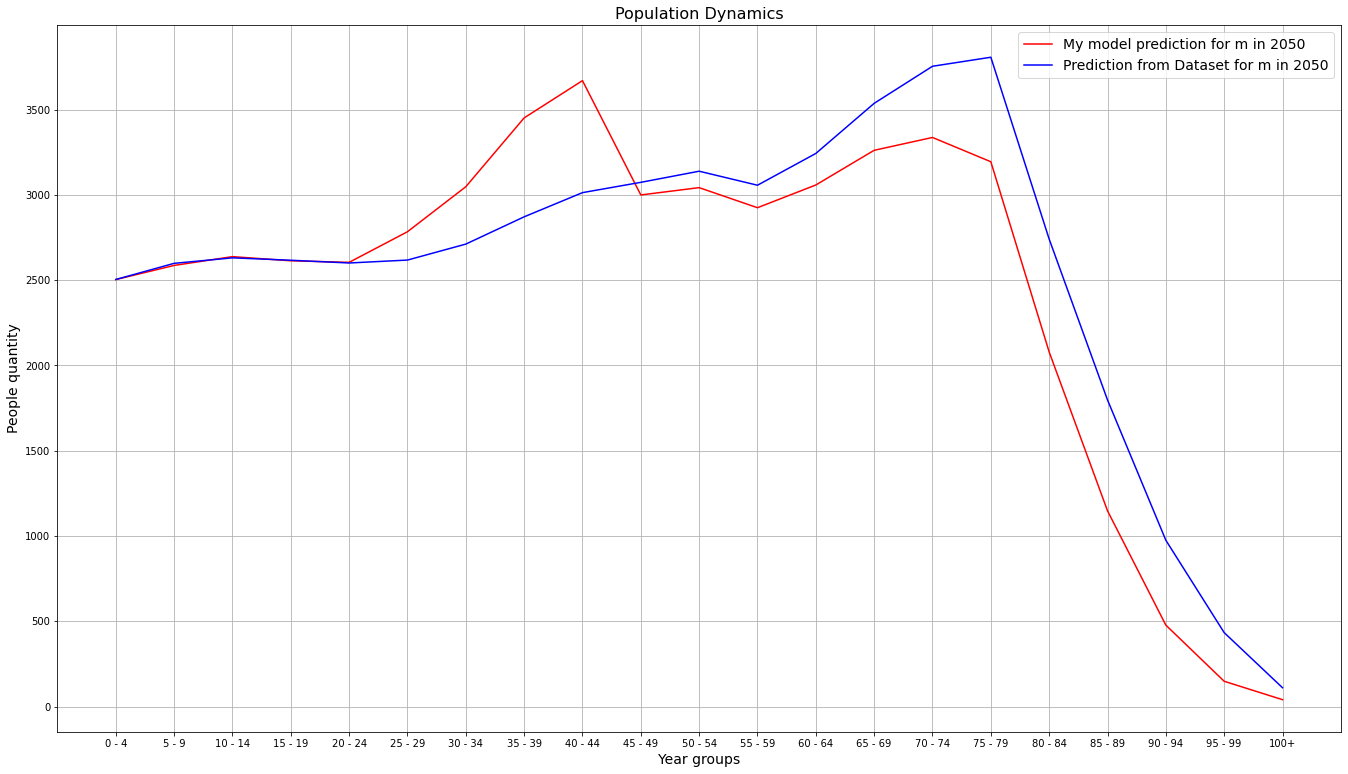

In [26]:
plot_analytics(sex = "m", year = 2050)

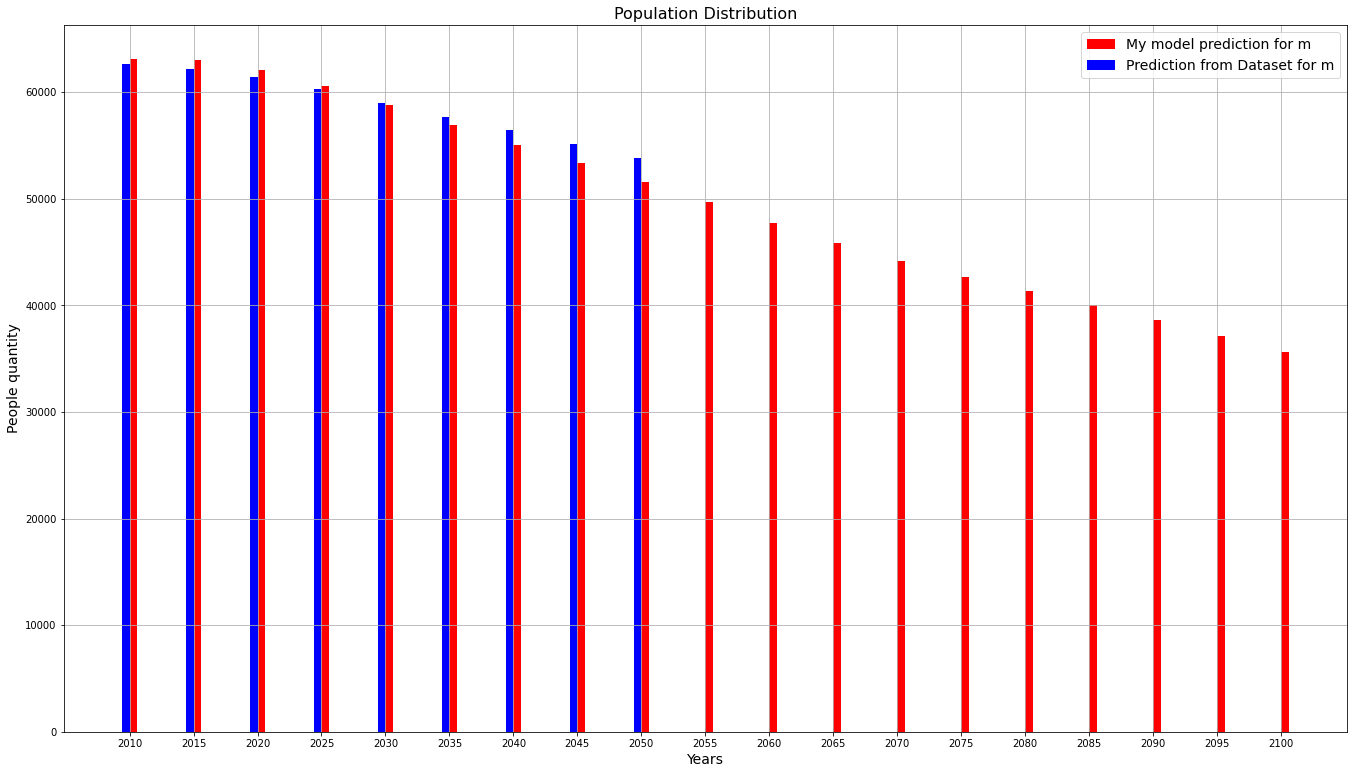

In [27]:
plot_histograms("m")

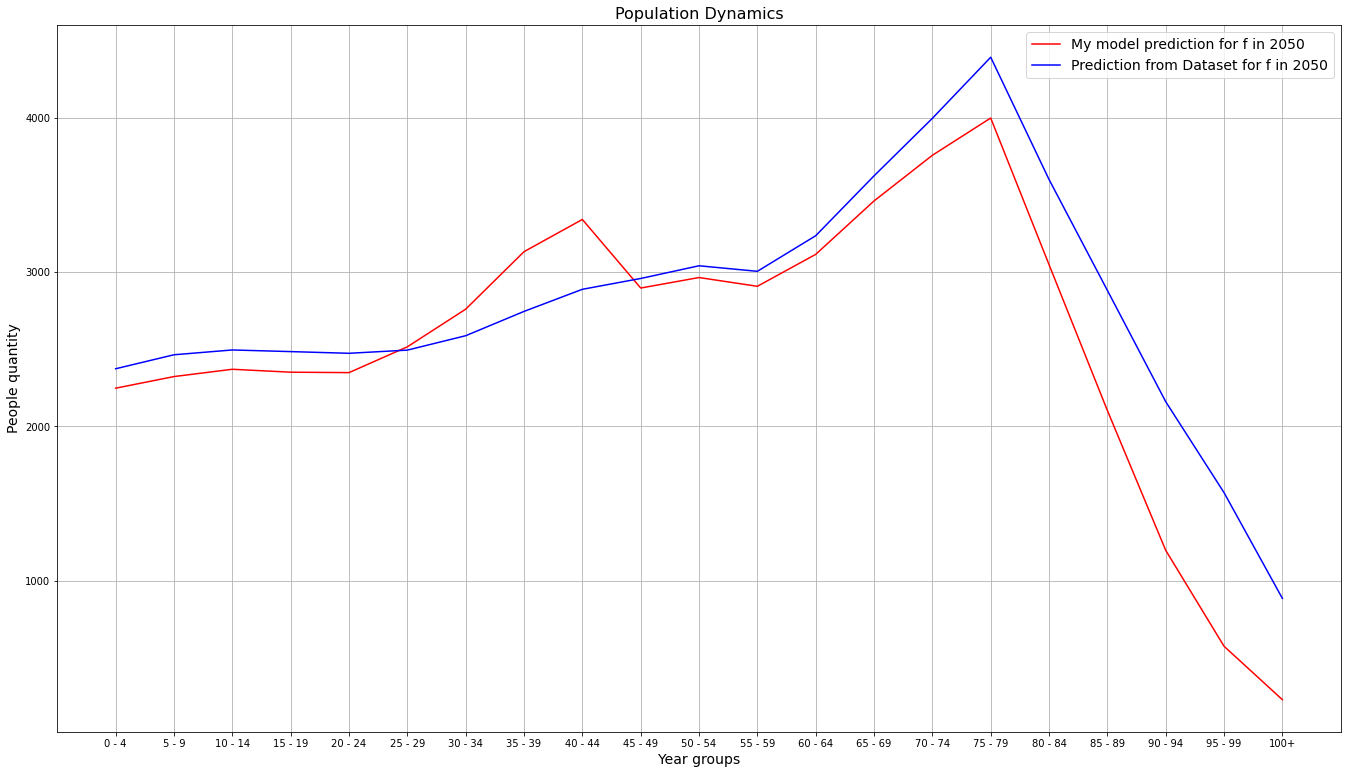

In [28]:
plot_analytics(sex = "f", year = 2050)

In [29]:
fin_df.to_csv(path_to_save_file, sep = ';', decimal = ',')

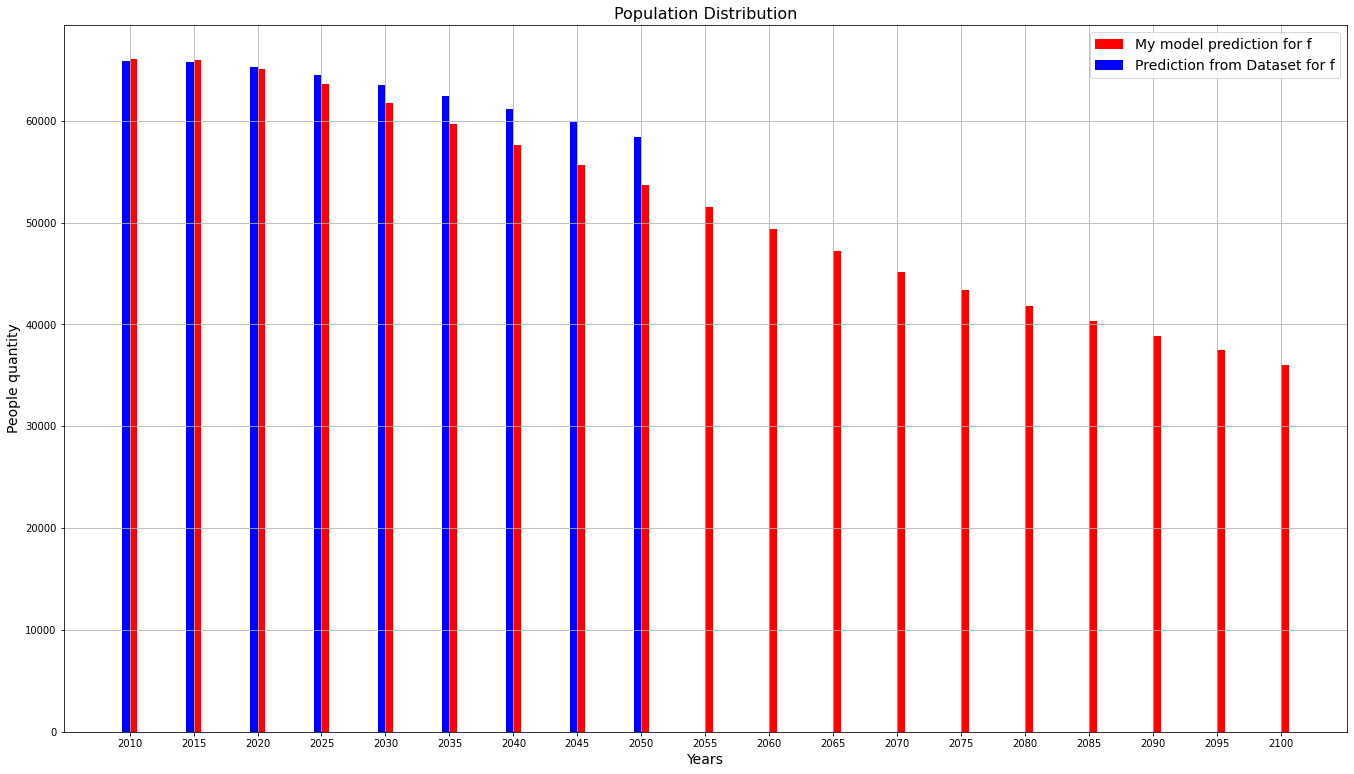

In [30]:
plot_histograms("f")

## Conclusions
The model for Japan was described, model parameters were calculated and population predistion was made. The predicted results were compared with existing ones. As one can see the proposed model makes similar prediction of population demographic profile as existent esimations.
At the same time implemented recurrent model doesn't consider some important factors that affect the demographic profile and is not very accurate for long distance predictions.